<a href="https://colab.research.google.com/github/msa1997/ads-2023/blob/main/ADS_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading data from Kaggle

### We load the dataset directly from Kaggle.


In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! echo "{\"username\":\"mohammadaliysz\",\"key\":\"e8f68a5df34c6dc24642db4faf2c79c5\"}" > kaggle.json
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d ruchi798/tv-shows-on-netflix-prime-video-hulu-and-disney

  0% 0.00/101k [00:00<?, ?B/s]
100% 101k/101k [00:00<00:00, 63.2MB/s]


In [ ]:
!unzip tv-shows-on-netflix-prime-video-hulu-and-disney.zip

Archive:  tv-shows-on-netflix-prime-video-hulu-and-disney.zip
  inflating: tv_shows.csv            


# Library

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #visualisation
import seaborn as sns
import re
from matplotlib.ticker import PercentFormatter
import os
import io
from sklearn.preprocessing import StandardScaler

%matplotlib inline
sns.set(color_codes=True)

### import dataset as a data frame

In [ ]:
tv_shows = pd.read_csv("tv_shows.csv")

# About Dataset

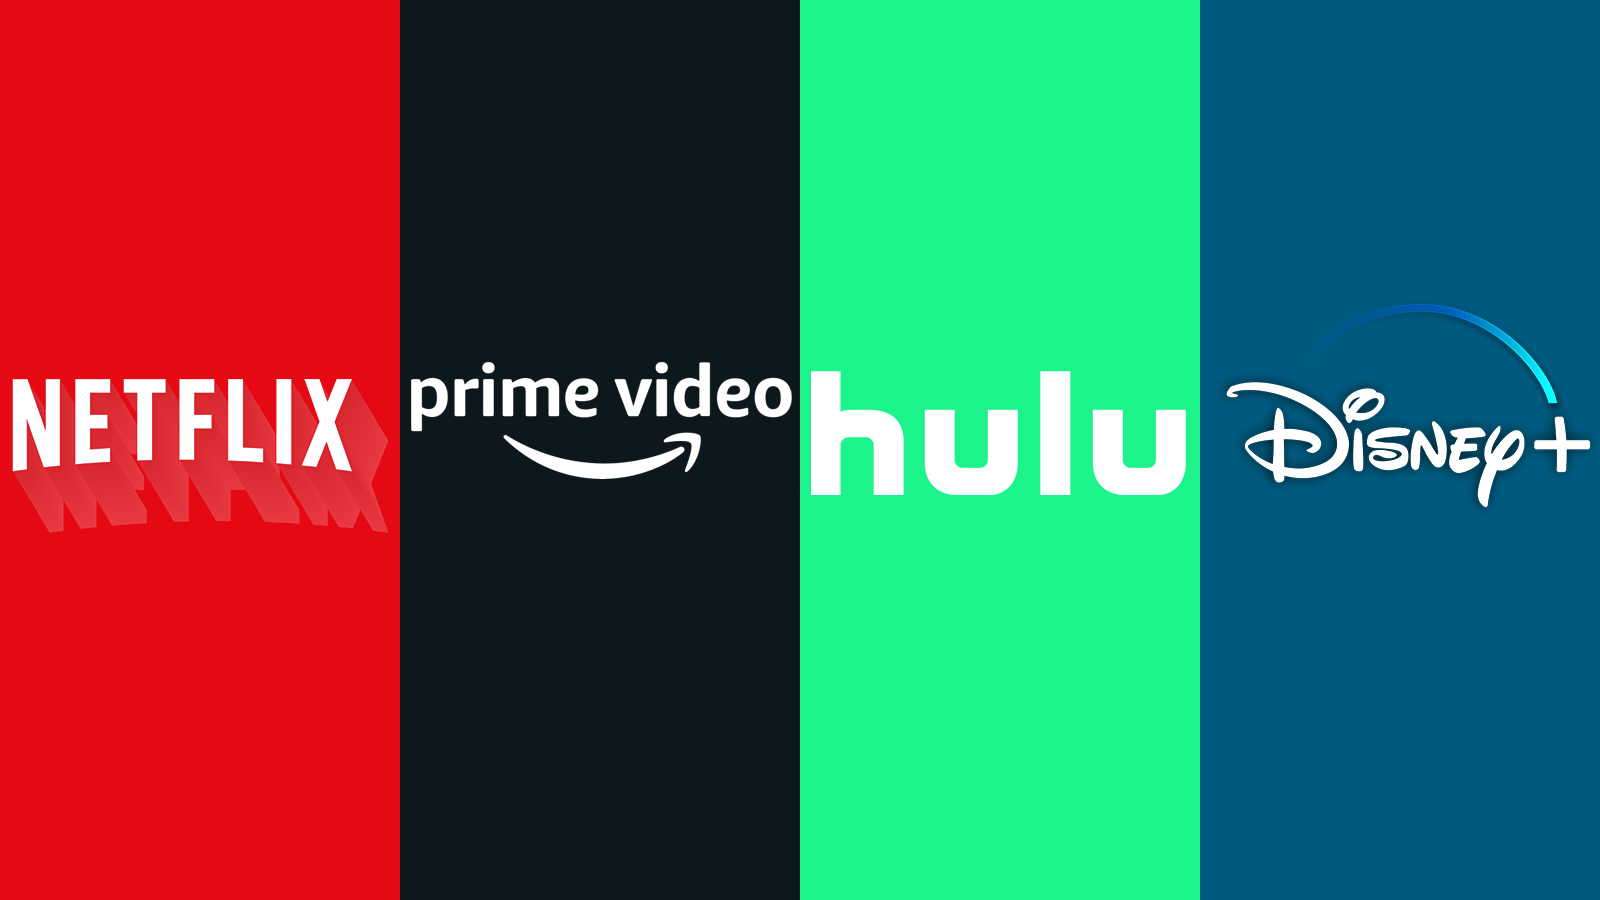

**Content**

 The data scraped comprises a comprehensive list of tv shows available on various streaming platforms.



**Inspiration**

*   Which streaming platform(s) can I find this tv show on?
*   Target age group tv shows vs the streaming application they can be found on.
*   The year during which a tv show was produced and the streaming platform they can be found on.








# A quick look at the dataset


In [ ]:
print(tv_shows.head(10))
print(tv_shows.shape)

   Unnamed: 0  ID                       Title  Year  Age    IMDb  \
0           0   1                Breaking Bad  2008  18+  9.4/10   
1           1   2             Stranger Things  2016  16+  8.7/10   
2           2   3             Attack on Titan  2013  18+  9.0/10   
3           3   4            Better Call Saul  2015  18+  8.8/10   
4           4   5                        Dark  2017  16+  8.8/10   
5           5   6  Avatar: The Last Airbender  2005   7+  9.3/10   
6           6   7              Peaky Blinders  2013  18+  8.8/10   
7           7   8            The Walking Dead  2010  18+  8.2/10   
8           8   9                Black Mirror  2011  18+  8.8/10   
9           9  10          The Queen's Gambit  2020  18+  8.6/10   

  Rotten Tomatoes  Netflix  Hulu  Prime Video  Disney+  Type  
0         100/100        1     0            0        0     1  
1          96/100        1     0            0        0     1  
2          95/100        1     1            0        0     1  

In [ ]:
tv_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5368 entries, 0 to 5367
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       5368 non-null   int64 
 1   ID               5368 non-null   int64 
 2   Title            5368 non-null   object
 3   Year             5368 non-null   int64 
 4   Age              3241 non-null   object
 5   IMDb             4406 non-null   object
 6   Rotten Tomatoes  5368 non-null   object
 7   Netflix          5368 non-null   int64 
 8   Hulu             5368 non-null   int64 
 9   Prime Video      5368 non-null   int64 
 10  Disney+          5368 non-null   int64 
 11  Type             5368 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 503.4+ KB


# Preprocessing

### We convert the IMDb & Rotten Tomatoes score to Numeric form.

In [ ]:
tv_shows.drop(['Unnamed: 0', 'Type'],axis=1, inplace=True) # The Unnamed & Type columns are nonsense.

In [ ]:
tv_shows['IMDb'] = tv_shows['IMDb'].str.replace('/10', '').astype(float)
tv_shows['Rotten Tomatoes'] = tv_shows['Rotten Tomatoes'].str.replace('/100', '').astype(float)

# We fill missing values in 'IMDb' and 'Rotten Tomatoes' with the mean of them.
tv_shows['IMDb'] = tv_shows['IMDb'].fillna(tv_shows['IMDb'].mean())
tv_shows['Rotten Tomatoes'] = tv_shows['Rotten Tomatoes'].fillna(tv_shows['Rotten Tomatoes'].mean())


In [ ]:
# Prepare data for the box plot (distribution of IMDb ratings)
ratings = tv_shows['IMDb']

# Create box plot for the distribution of IMDb ratings
plt.figure(figsize=(10, 7))
plt.boxplot(ratings, patch_artist=True, boxprops=dict(facecolor="#FF9900"))
plt.title('Distribution of IMDb Ratings Among TV Shows')
plt.ylabel('IMDb Ratings')
plt.xticks([1], ['TV Shows'])  # Only one category, hence [1]
plt.grid(axis='y')
plt.show()

In [ ]:
tv_shows.head()

,ID,Title,Year,Age,Netflix,Hulu,Prime Video,Disney+,IMDb,Rotten_Tomatoes
0,1,Breaking Bad,2008,18+,1,0,0,0,9.4,100
1,2,Stranger Things,2016,16+,1,0,0,0,8.7,96
2,3,Attack on Titan,2013,18+,1,1,0,0,9.0,95
3,4,Better Call Saul,2015,18+,1,0,0,0,8.8,94
4,5,Dark,2017,16+,1,0,0,0,8.8,93


# Pie Chart

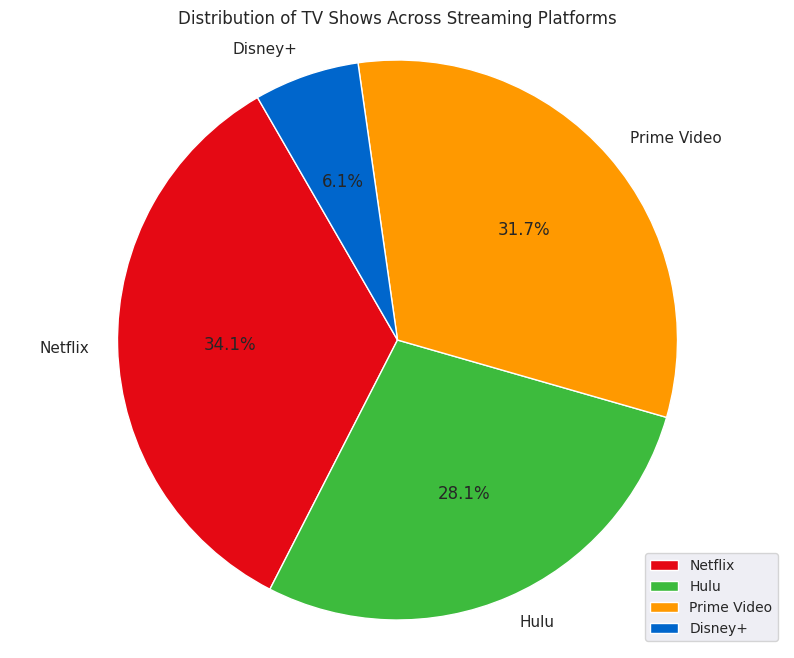

In [ ]:
platforms = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
platform_counts = [tv_shows[platform].sum() for platform in platforms]

plt.figure(figsize=(10, 8))
plt.pie(platform_counts, labels=platforms, autopct='%1.1f%%', startangle=120, colors=['#E50914', '#3DBB3D', '#FF9900', '#0066CC'])
plt.axis('equal')
plt.title('Distribution of TV Shows Across Streaming Platforms')
plt.legend(platforms,loc='lower right',fontsize=10)
plt.show()


# Box Plot

Box plot for the distribution of IMDb ratings.


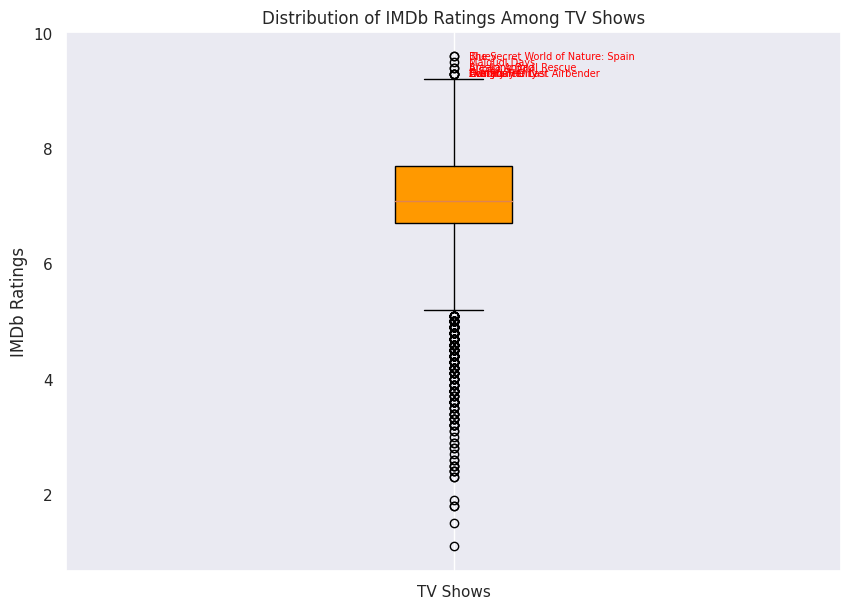

List of high rated shows = ['Breaking Bad', 'Avatar: The Last Airbender', 'Our Planet', 'Cosmos', 'Hungry Henry', 'Malgudi Days', 'Everyday Driver', 'The Secret World of Nature: Spain', 'Bluey', 'Alaska Animal Rescue']


In [ ]:
ratings = tv_shows['IMDb']

# Create box plot for the distribution of IMDb ratings
plt.figure(figsize=(10, 7))
plt.boxplot(ratings, patch_artist=True, boxprops=dict(facecolor="#FF9900"))

outliers = {}
# Calculate IQR and determine outliers
Q1 = tv_shows['IMDb'].quantile(0.25)
Q3 = tv_shows['IMDb'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR    # lower bound
upper_bound = Q3 + 1.5 * IQR    # upper bound

# Store the number of outliers
outliers = tv_shows[(tv_shows['IMDb'] < lower_bound) | (tv_shows['IMDb'] > upper_bound)]
list_of_high_rated_shows=[]
# print(outliers['IMDb'])
outliers = pd.DataFrame(outliers)
for row in range(len(outliers)):
    #  print(outliers.iloc[row,4])
     val =float(outliers.iloc[row,4])
     if val > upper_bound:
         plt.text(1.02, val, outliers.iloc[row,1], ha='left', va='center',color='red',fontsize=7)
         list_of_high_rated_shows.append(outliers.iloc[row,1])

plt.title('Distribution of IMDb Ratings Among TV Shows')
plt.ylabel('IMDb Ratings')
plt.xticks([1], ['TV Shows'])
plt.grid(axis='y')
plt.show()
print('List of high rated shows =',list_of_high_rated_shows)


Box plot for the distribution of Rotten Tomatoes ratings.


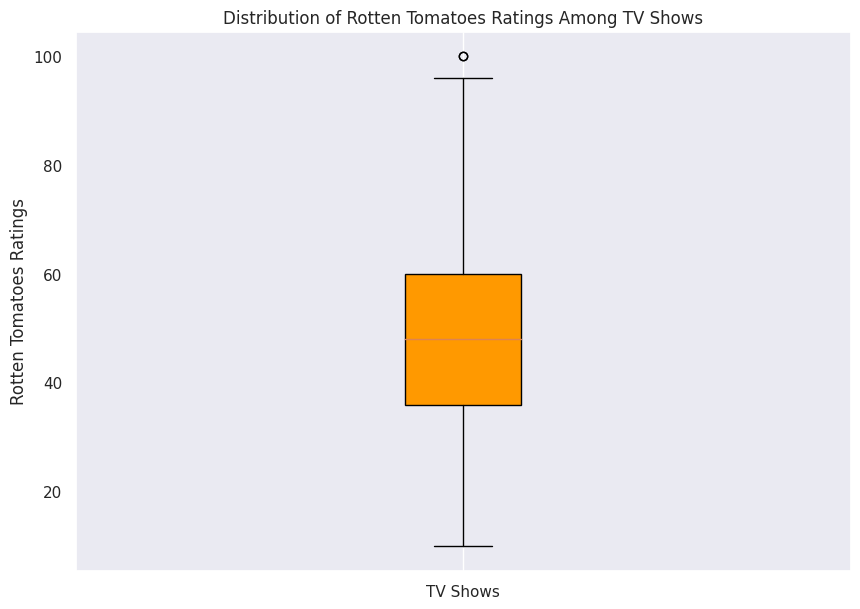

List of high rated shows = []


In [ ]:
rating = tv_shows['Rotten Tomatoes']

# Create box plot for the distribution of Rotten Tomatoes ratings
plt.figure(figsize=(10, 7))
plt.boxplot(ratings, patch_artist=True, boxprops=dict(facecolor="#FF9900"))

outlier = {}
# Calculate IQR and determine outliers
Q1 = tv_shows['Rotten Tomatoes'].quantile(0.25)
Q3 = tv_shows['Rotten Tomatoes'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR    # lower bound
upper_bound = Q3 + 1.5 * IQR    # upper bound

# Store the number of outliers
outlier = tv_shows[(tv_shows['Rotten Tomatoes'] > upper_bound)]
list_of_high_rated_shows=[]
# print(outliers['IMDb'])
outlier = pd.DataFrame(outlier)
for row in range(len(outlier)):
    #  print(outliers.iloc[row,4])
     val =float(outlier.iloc[row,4])
     if val > upper_bound:
         plt.text(1.02, val, outlier.iloc[row,1], ha='left', va='center',color='red',fontsize=7)
         list_of_high_rated_shows.append(outliers.iloc[row,1])

plt.title('Distribution of Rotten Tomatoes Ratings Among TV Shows')
plt.ylabel('Rotten Tomatoes Ratings')
plt.xticks([1], ['TV Shows'])
plt.grid(axis='y')
plt.show()
print('List of high rated shows =',list_of_high_rated_shows)

# Line Chart

### **Line Chart** for Growth in Number of TV Shows Over the Years

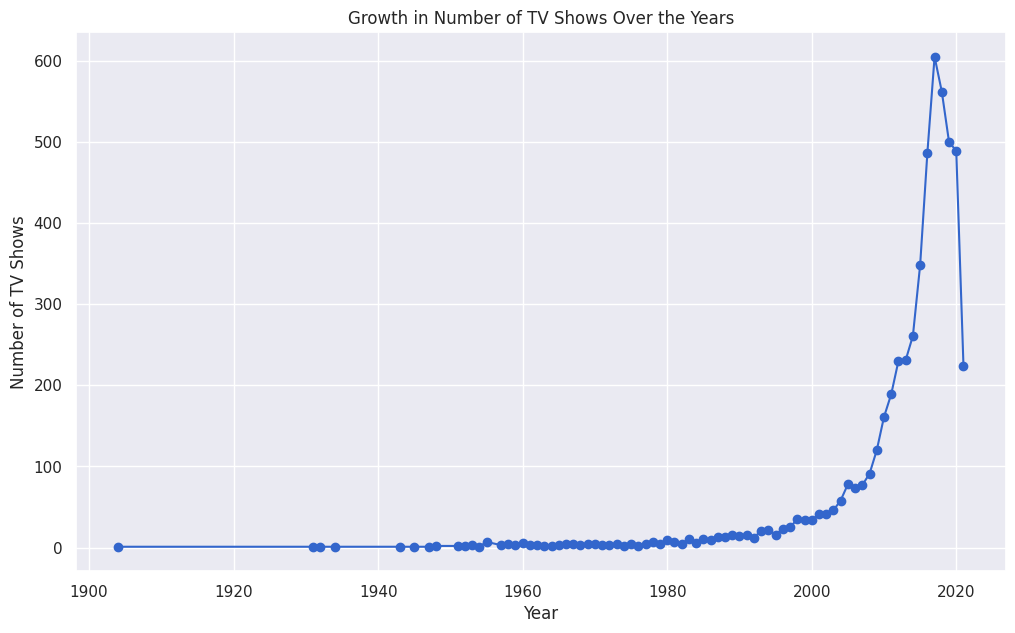

In [ ]:
yearly_counts = tv_shows.groupby('Year').size().reset_index(name='counts')

# Line chart for the number of TV shows over the years
plt.figure(figsize=(12, 7))
plt.plot(yearly_counts['Year'], yearly_counts['counts'], marker='o', linestyle='-', color='#3366CC')
plt.title('Growth in Number of TV Shows Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of TV Shows')
plt.grid(True)
plt.show()

### **Line Charts** for IMDb score of TV shows per streaming service

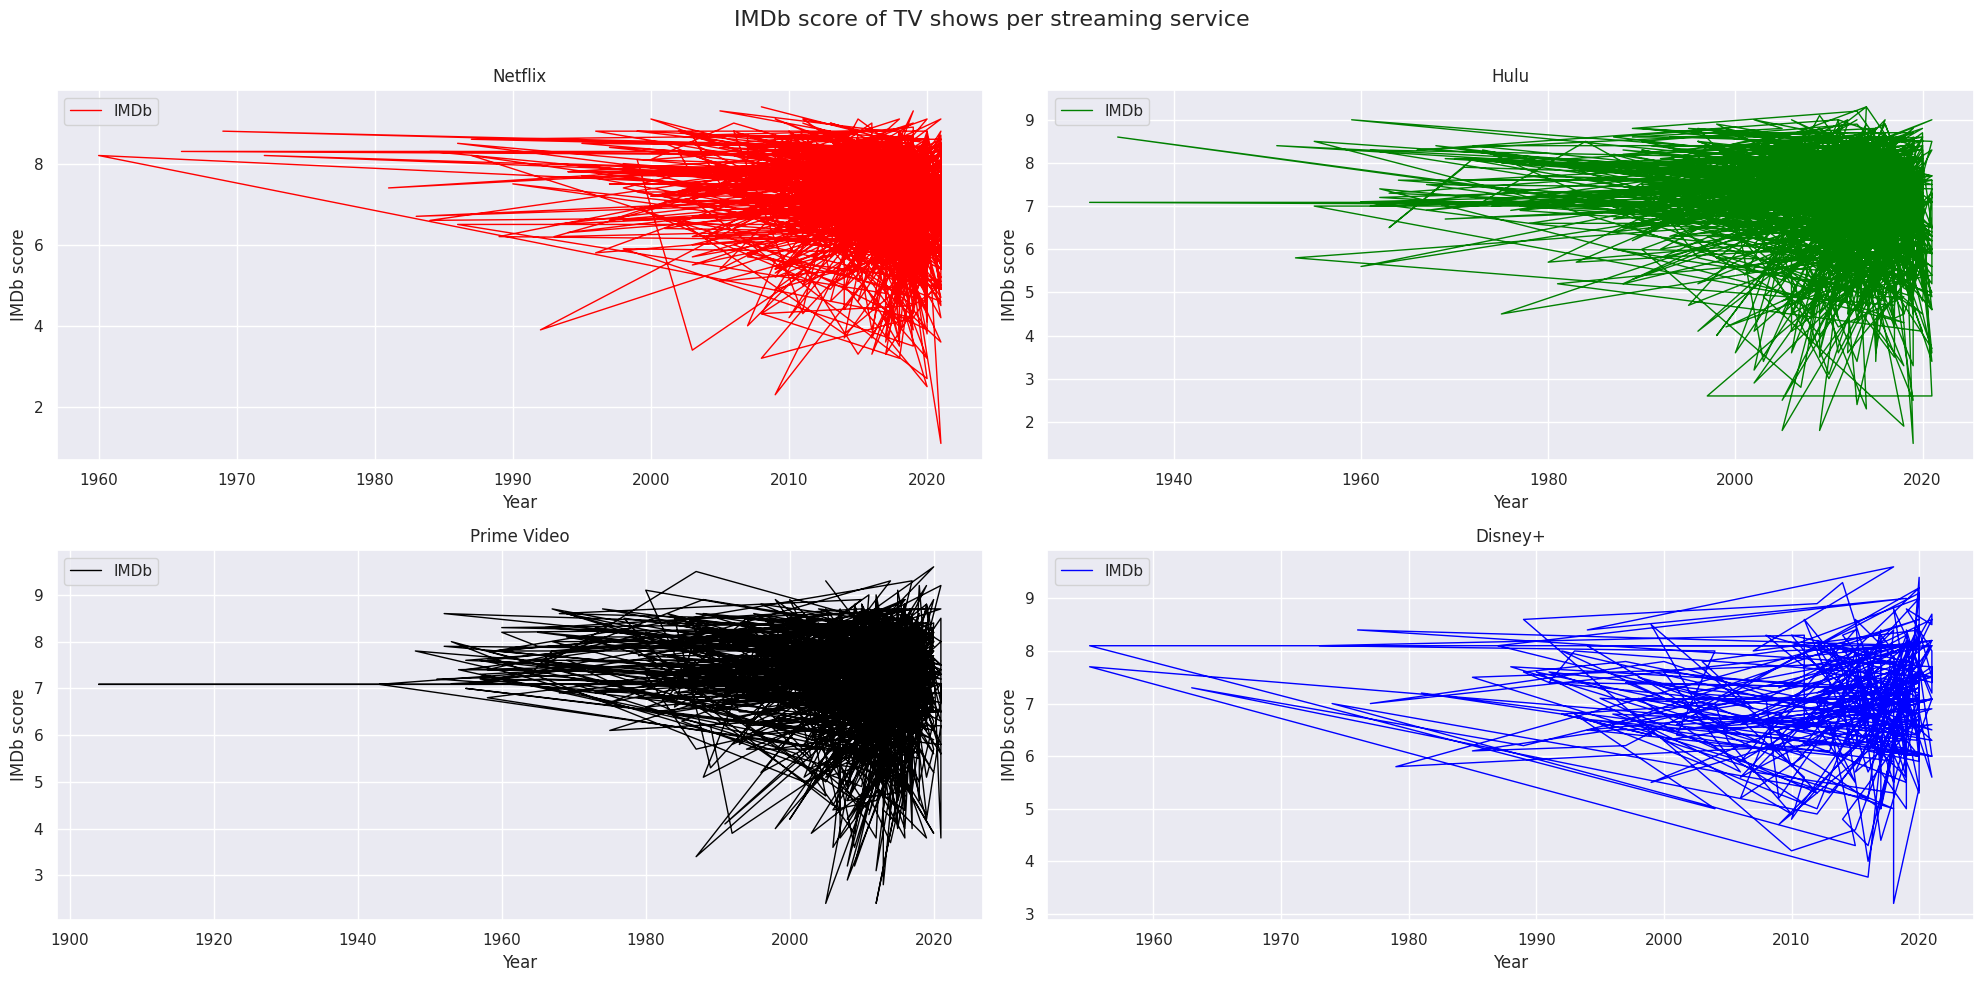

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
axs = axs.flatten()  # Flattening the 2x2 grid to easily index for each plot

tv_shows[tv_shows['Netflix'] == 1].plot.line(x='Year', y='IMDb', lw=1, ax=axs[0], color='red')
axs[0].set_title('Netflix')
axs[0].set_ylabel('IMDb score')
axs[0].grid(True)

tv_shows[tv_shows['Hulu'] == 1].plot.line(x='Year', y='IMDb', lw=1, ax=axs[1], color='green')
axs[1].set_title('Hulu')
axs[1].set_ylabel('IMDb score')
axs[1].grid(True)

tv_shows[tv_shows['Prime Video'] == 1].plot.line(x='Year', y='IMDb', lw=1, ax=axs[2], color='black')
axs[2].set_title('Prime Video')
axs[2].set_ylabel('IMDb score')
axs[2].grid(True)

tv_shows[tv_shows['Disney+'] == 1].plot.line(x='Year', y='IMDb', lw=1, ax=axs[3], color='blue')
axs[3].set_title('Disney+')
axs[3].set_ylabel('IMDb score')
axs[3].grid(True)

plt.suptitle('IMDb score of TV shows per streaming service', fontsize=16)
plt.tight_layout() # Adjusting the layout to fit nicely
plt.subplots_adjust(top=0.9) # Leaving space for the suptitle
plt.show()

# Stacked Line Chart

### **Stacked Line Chart** for Growth in TV Show Availability per Platform Over the Years

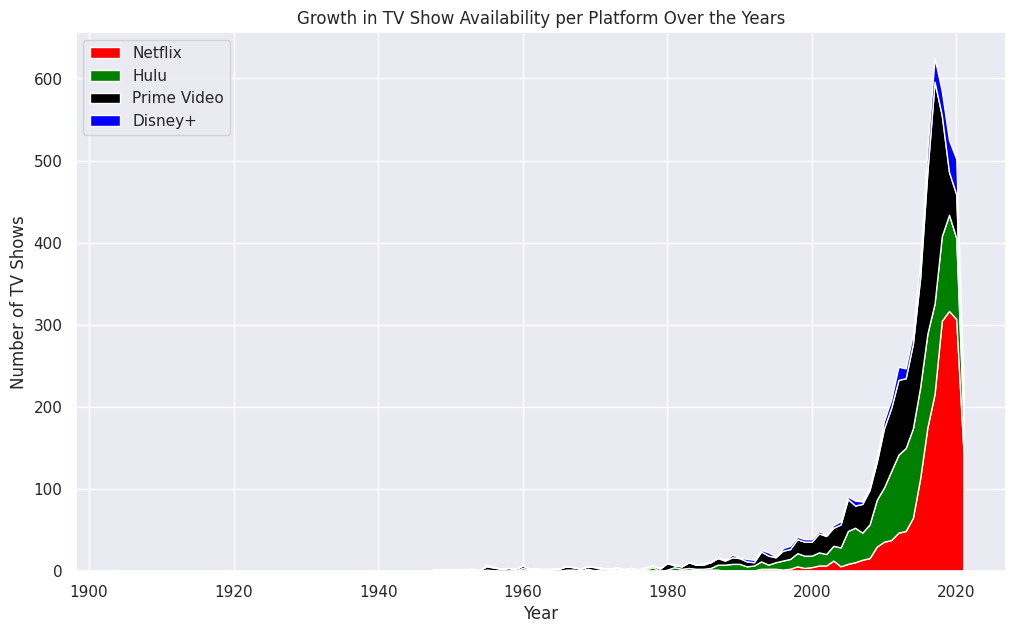

In [ ]:
platform_data = tv_shows[['Year', 'Netflix', 'Hulu', 'Prime Video', 'Disney+']]
platform_yearly = platform_data.groupby('Year').sum()
plt.figure(figsize=(12, 7))

# Building a stackplot
plt.stackplot(platform_yearly.index, platform_yearly['Netflix'], platform_yearly['Hulu'],
              platform_yearly['Prime Video'], platform_yearly['Disney+'],
              labels=['Netflix', 'Hulu', 'Prime Video', 'Disney+'],
              colors=['red', 'green', 'black', 'blue'])
plt.title('Growth in TV Show Availability per Platform Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of TV Shows')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# Bar Chart

### **Bar Chart** for Average Rotten Tomatoes Ratings

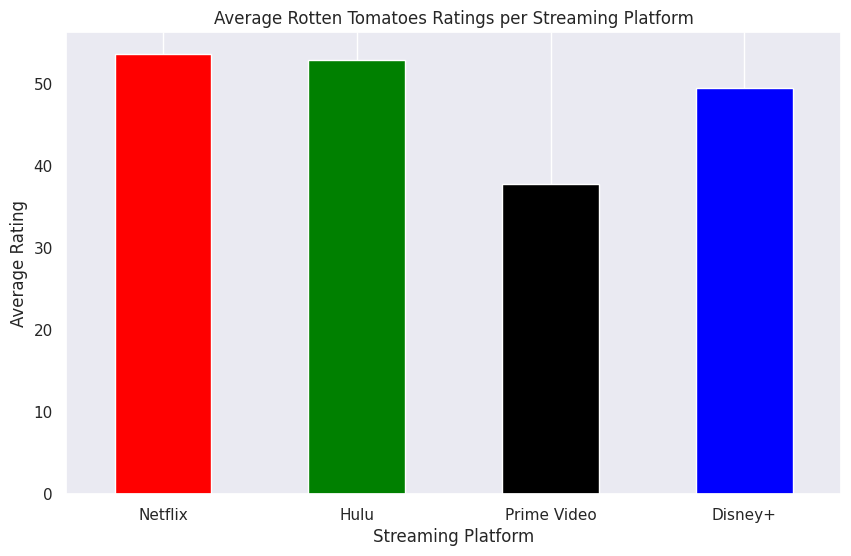

In [ ]:
# Calculate the average ratings per platform
platform_avg_ratings = tv_shows[['Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Rotten Tomatoes']].copy()
platform_avg_ratings['Netflix'] *= platform_avg_ratings['Rotten Tomatoes']
platform_avg_ratings['Hulu'] *= platform_avg_ratings['Rotten Tomatoes']
platform_avg_ratings['Prime Video'] *= platform_avg_ratings['Rotten Tomatoes']
platform_avg_ratings['Disney+'] *= platform_avg_ratings['Rotten Tomatoes']
avg_ratings = platform_avg_ratings[['Netflix', 'Hulu', 'Prime Video', 'Disney+']].replace(0, np.nan).mean()


plt.figure(figsize=(10, 6))
avg_ratings.plot(kind='bar', color=['red', 'green', 'black', 'blue'])
plt.title('Average Rotten Tomatoes Ratings per Streaming Platform')
plt.ylabel('Average Rating')
plt.xlabel('Streaming Platform')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

### **Bar Chart** for **Rotten Tomatoes** Scores Distribution

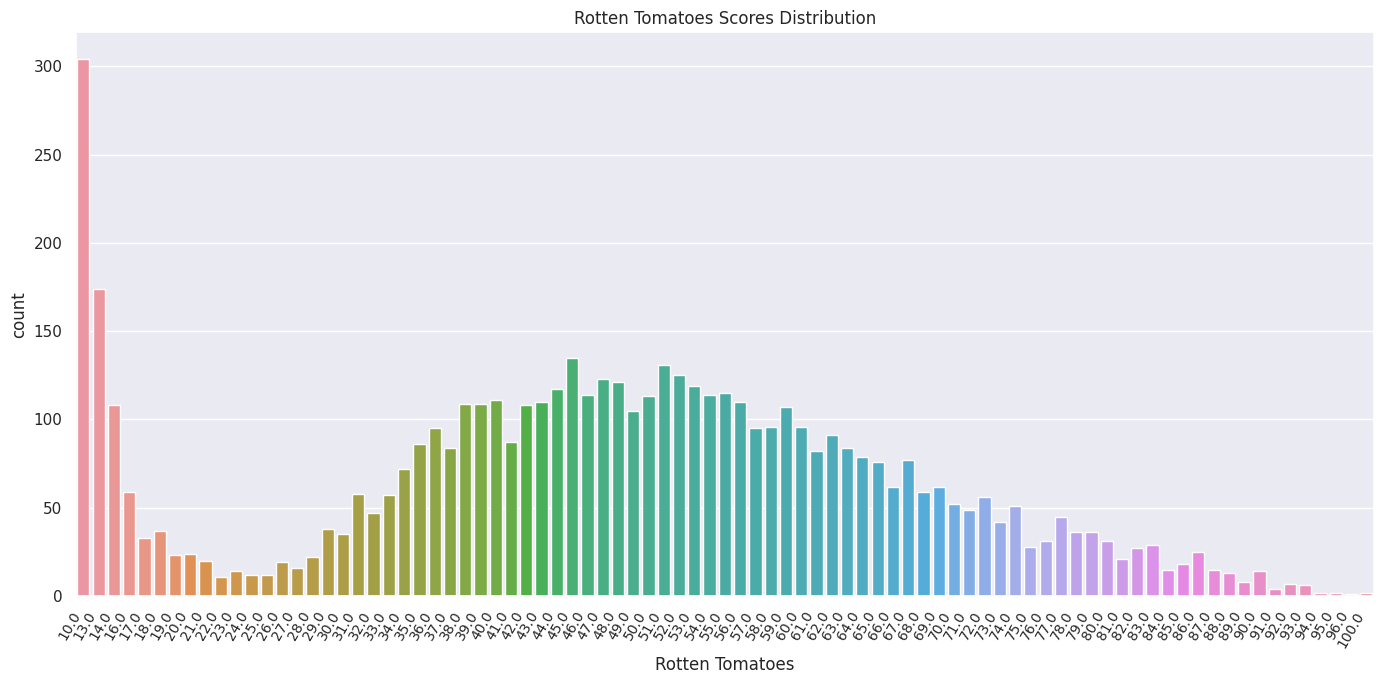

In [ ]:
plt.figure(figsize=(14,7))
b=sns.countplot(x="Rotten Tomatoes", data=tv_shows)
b.set_xticklabels(b.get_xticklabels() ,fontsize=10, rotation=60, ha="right")
plt.title("Rotten Tomatoes Scores Distribution")
plt.tight_layout()

### **Bar Chart** for Count of Movies for each **Year**

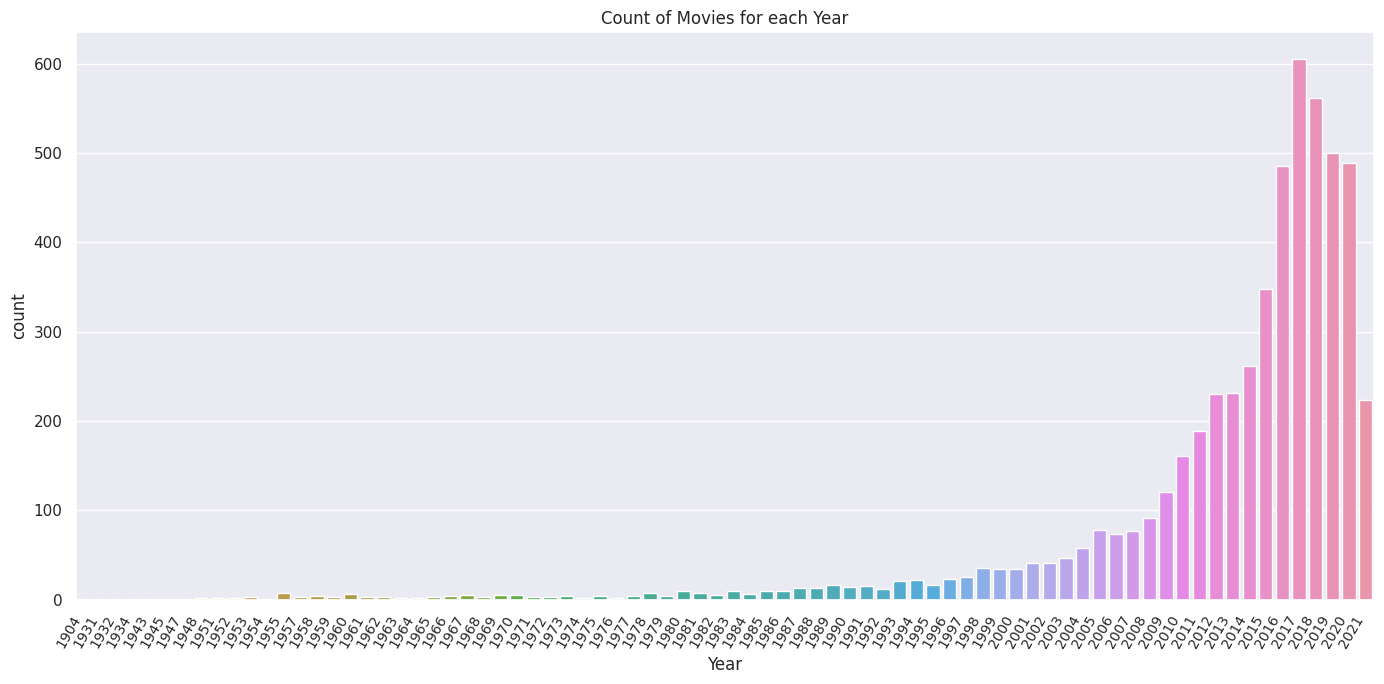

In [ ]:
plt.figure(figsize=(14,7))
b=sns.countplot(x="Year", data=tv_shows)
b.set_xticklabels(b.get_xticklabels() ,fontsize=10, rotation=60, ha="right")
plt.title("Count of Movies for each Year")
plt.tight_layout()

### **Bar Chart** for Count of Shows for each **Age** Category per Platform

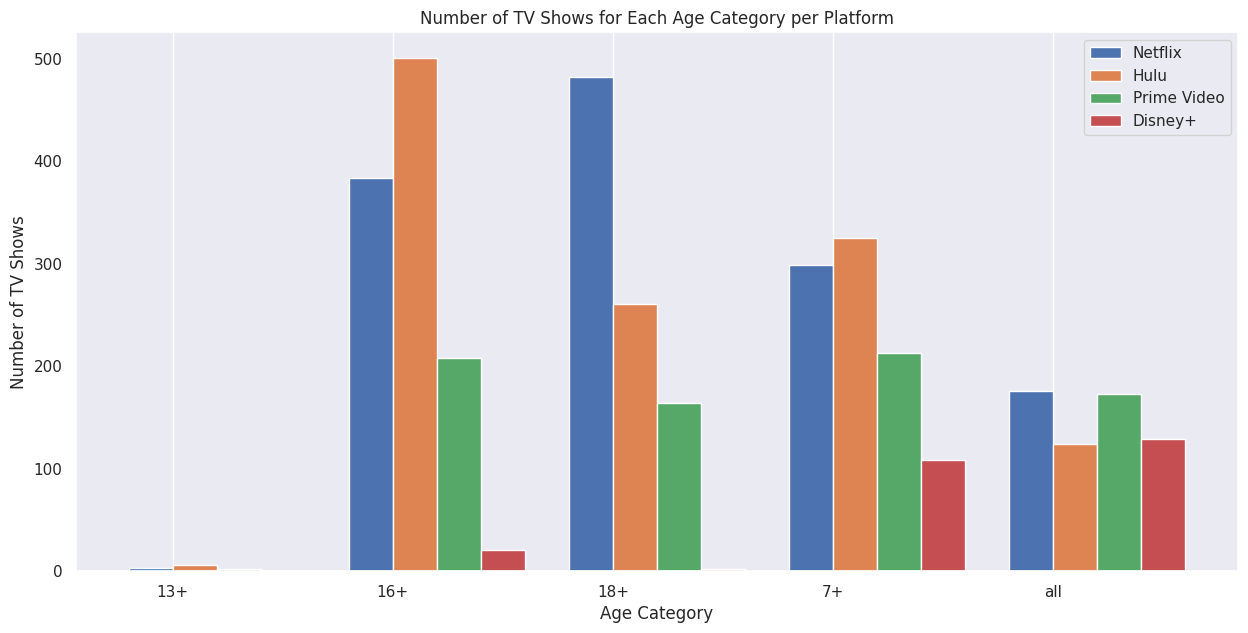

In [ ]:
age_platform = tv_shows.pivot_table(index='Age', values=['Netflix', 'Hulu', 'Prime Video', 'Disney+'], aggfunc='sum')
age_categories = age_platform.index

fig, ax = plt.subplots(figsize=(15, 7))
bar_width = 0.2
bar_positions = np.arange(len(age_categories))

for i, platform in enumerate(['Netflix', 'Hulu', 'Prime Video', 'Disney+']):
    ax.bar(bar_positions + i * bar_width, age_platform[platform], width=bar_width, label=platform)

ax.set_title('Number of TV Shows for Each Age Category per Platform')
ax.set_xlabel('Age Category')
ax.set_ylabel('Number of TV Shows')
ax.set_xticks(bar_positions + bar_width / 2)
ax.set_xticklabels(age_categories)
ax.legend()
plt.grid(axis='y')
plt.show()

# Stacked Bar Chart

### **Stacked** Bar Chart for the Number of TV Shows in each **Age** Category


<ipython-input-65-391cae465d80>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  age_distribution = tv_shows.groupby('Age').sum()[['Netflix', 'Hulu', 'Prime Video', 'Disney+']]


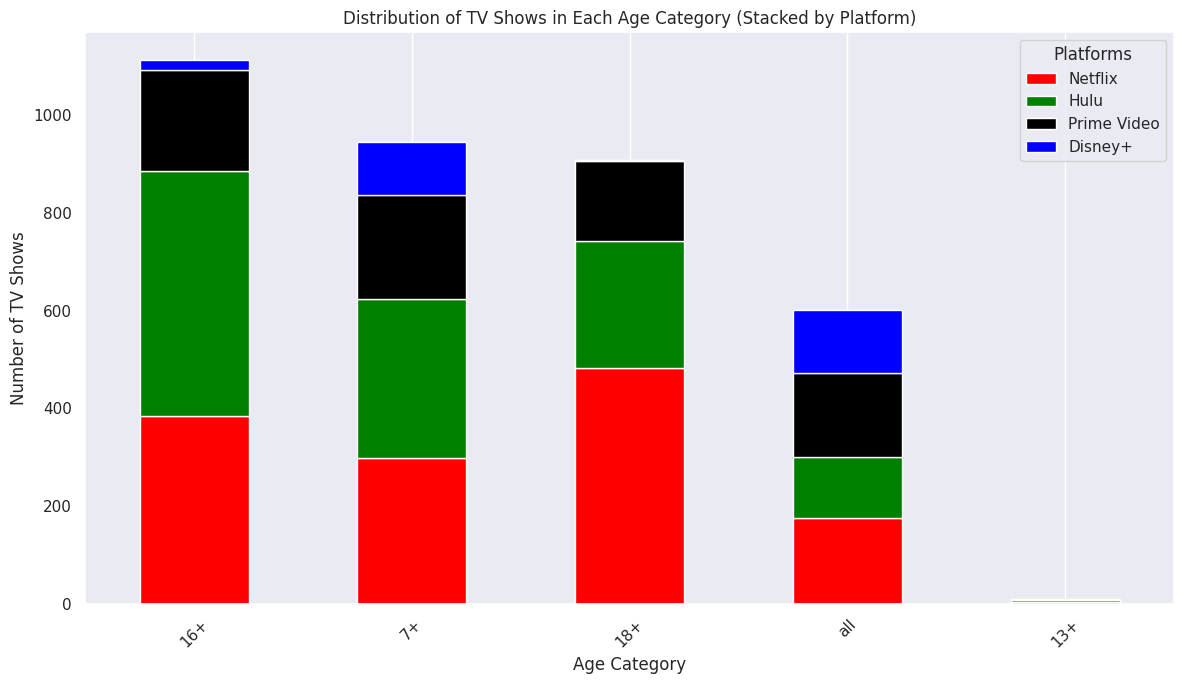

In [ ]:
age_counts = tv_shows['Age'].value_counts()

age_distribution = tv_shows.groupby('Age').sum()[['Netflix', 'Hulu', 'Prime Video', 'Disney+']]
age_distribution.loc[:, 'Total'] = age_distribution.sum(axis=1)

# Sorting the dataset based on the 'Total' column
age_distribution = age_distribution.sort_values('Total', ascending=False)

age_distribution.drop(columns='Total').plot(kind='bar', stacked=True, figsize=(12, 7),
                                            color=['red', 'green', 'black', 'blue'])
plt.title('Distribution of TV Shows in Each Age Category (Stacked by Platform)')
plt.xlabel('Age Category')
plt.ylabel('Number of TV Shows')
plt.xticks(rotation=45)
plt.legend(title='Platforms')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

# Scatter Plot

### **Scatter** Plot for IMDb Ratings vs. Year of Release

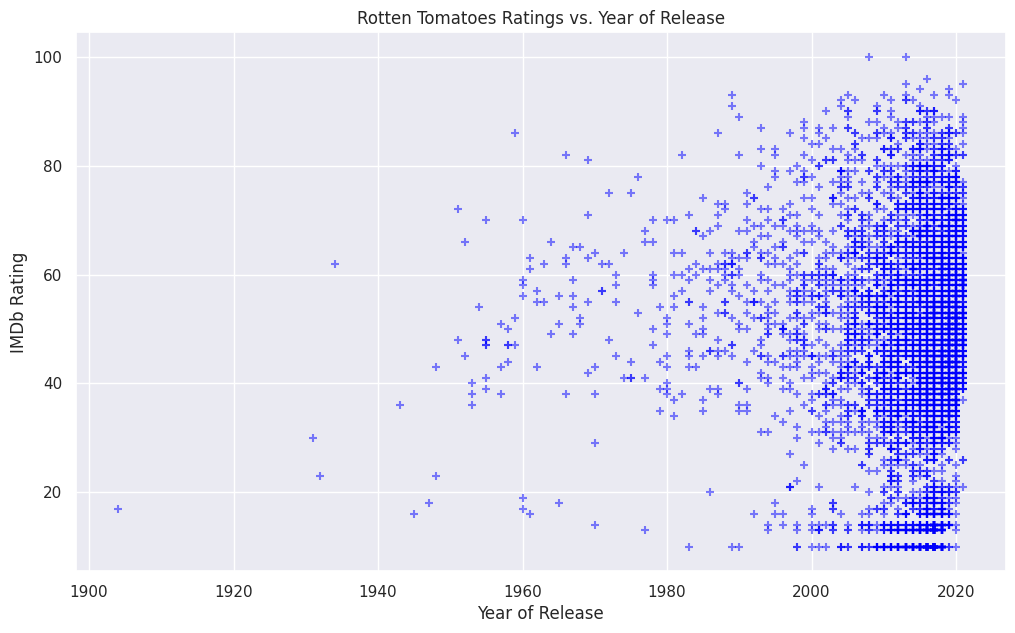

In [ ]:
# Adding a new column that indicates the number of platforms
tv_shows['Num_of_Platforms'] = tv_shows[['Netflix', 'Hulu', 'Prime Video', 'Disney+']].sum(axis=1)

plt.figure(figsize=(12, 7))
plt.scatter(tv_shows['Year'], tv_shows['Rotten Tomatoes'], c='blue',marker='+', alpha=0.5)
plt.title('Rotten Tomatoes Ratings vs. Year of Release')
plt.xlabel('Year of Release')
plt.ylabel('IMDb Rating')
plt.grid(True)
plt.show()

### **Scatter** Plot for IMDb of tv shows specified by age group

Text(0.5, 1.0, 'IMDb of tv shows specified by age group')

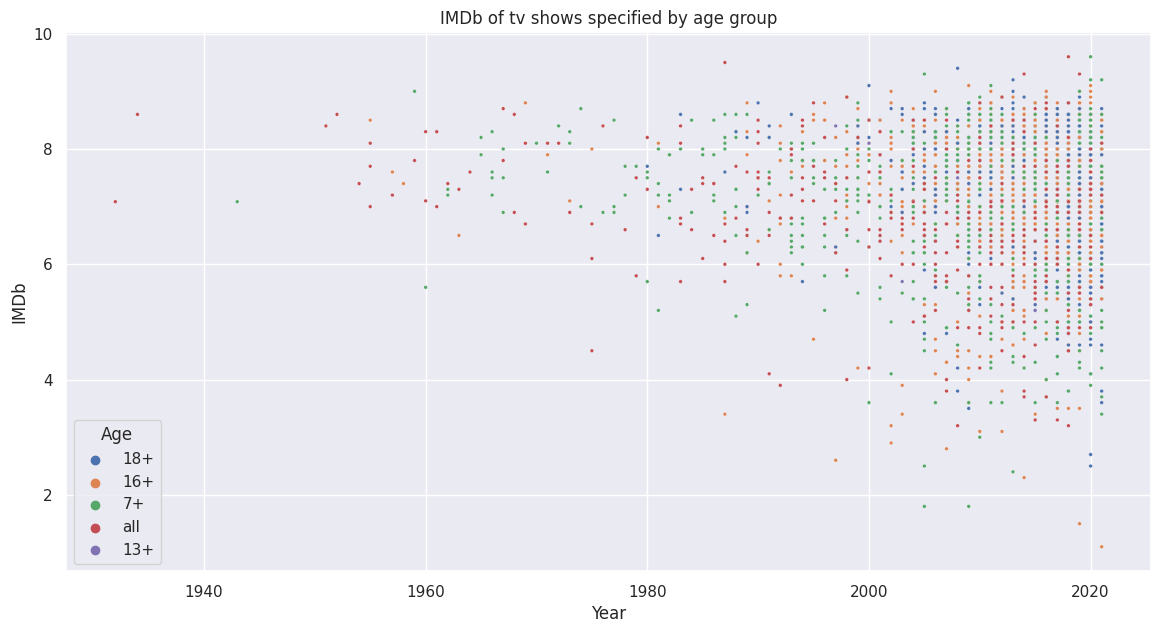

In [ ]:
plt.figure(figsize=(14,7))
sns.scatterplot(data=tv_shows, x="Year", y="IMDb", s=7, hue="Age")
plt.title('IMDb of tv shows specified by age group')

# Bubble Chart

### **Bubble** Chart for IMDb Ratings vs. Year of Release (Size by Number of Platforms)

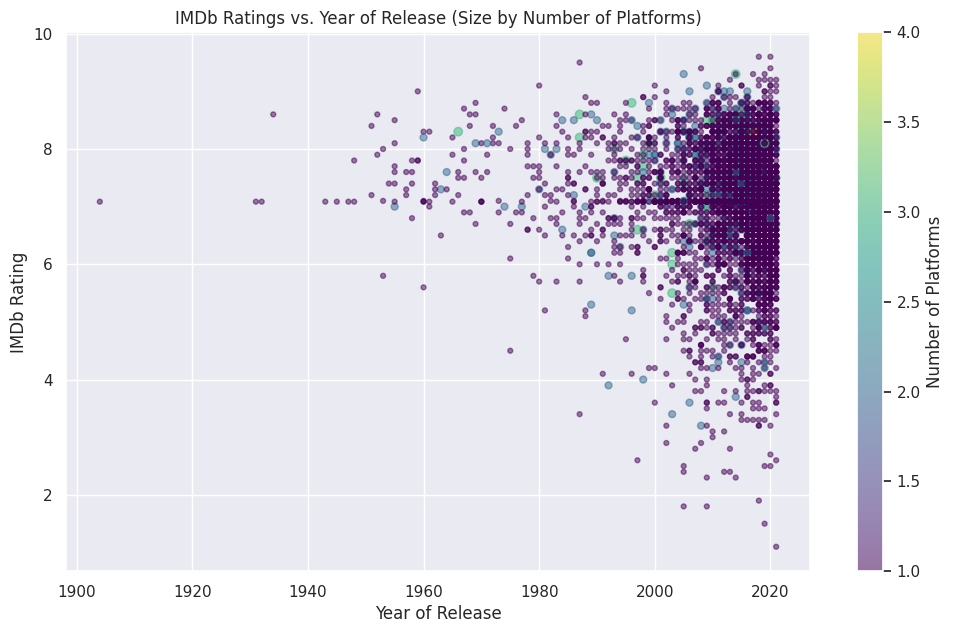

In [ ]:
plt.figure(figsize=(12, 7))
plt.scatter(tv_shows['Year'], tv_shows['IMDb'], s=tv_shows['Num_of_Platforms']*50, alpha=0.5, c=tv_shows['Num_of_Platforms'],marker='.', cmap='viridis')

plt.colorbar(label='Number of Platforms')

plt.title('IMDb Ratings vs. Year of Release (Size by Number of Platforms)')
plt.xlabel('Year of Release')
plt.ylabel('IMDb Rating')
plt.grid(True)
plt.show()

### **Bubble** Chart for Rotten Tomatoes Ratings vs. Year of Release (Size by Number of Platforms)

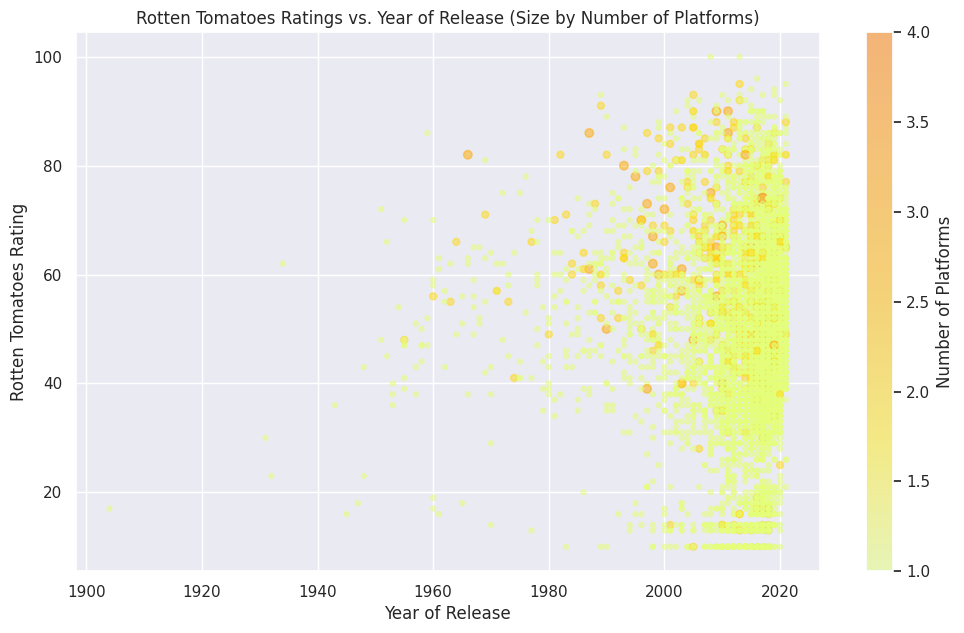

In [ ]:
plt.figure(figsize=(12, 7))
plt.scatter(tv_shows['Year'], tv_shows['Rotten Tomatoes'], s=tv_shows['Num_of_Platforms']*50, alpha=0.5, c=tv_shows['Num_of_Platforms'],marker='.', cmap='Wistia')

plt.colorbar(label='Number of Platforms')

plt.title('Rotten Tomatoes Ratings vs. Year of Release (Size by Number of Platforms)')
plt.xlabel('Year of Release')
plt.ylabel('Rotten Tomatoes Rating')
plt.grid(True)
plt.show()

# Error Bars

### Average IMDb Ratings of TV Shows by Year with **Error Bars**

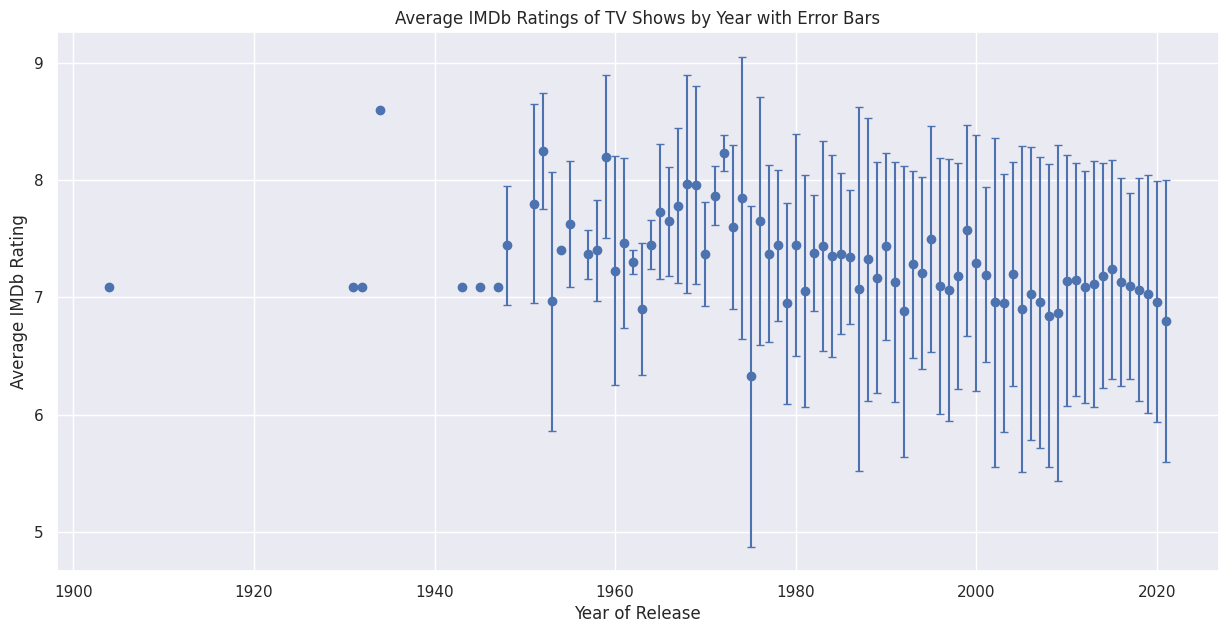

In [ ]:
# Calculating mean ratings and standard deviation for each year
yearly_ratings = tv_shows.groupby('Year')['IMDb'].agg(['mean', 'std']).reset_index()

# Since there may be years with only one show, standard deviation will be NaN. We replace NaNs with 0.
yearly_ratings = yearly_ratings.fillna(0)

# Creating a plot with error bars
plt.figure(figsize=(15, 7))

# Error bar for each point represents the standard deviation of ratings for the year
plt.errorbar(yearly_ratings['Year'], yearly_ratings['mean'], yearly_ratings['std'], linestyle='None', marker='o', capsize=3)
plt.title('Average IMDb Ratings of TV Shows by Year with Error Bars')
plt.xlabel('Year of Release')
plt.ylabel('IMDb Rating')
plt.grid(True)
plt.show()

### Average Rotten Tomatoes Ratings of TV Shows by Year with **Error Bars**

Text(0.5, 0, 'Year of Release')

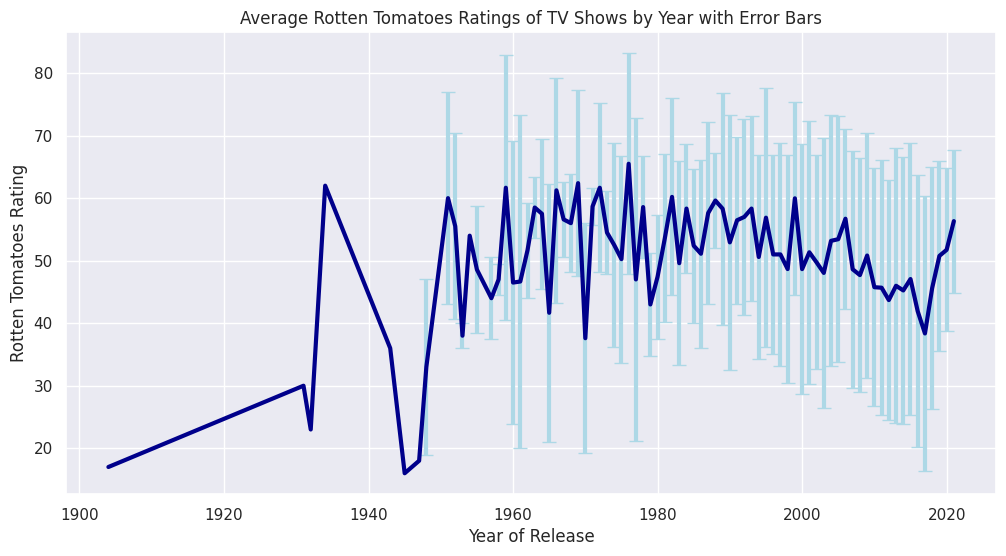

In [ ]:
plt.figure(figsize=(12,6))
a = tv_shows.groupby(["Year"])
err1 = a["Rotten Tomatoes"].std()
a["Rotten Tomatoes"].mean().plot.line(color='DarkBlue',figsize=(12,6),legend=[],linewidth=3,grid=True,yerr=err1, capsize=5,ecolor='LightBlue')

plt.title('Average Rotten Tomatoes Ratings of TV Shows by Year with Error Bars')
plt.ylabel('Rotten Tomatoes Rating')
plt.xlabel('Year of Release')


# Interactive Charts (Plotly)

### Creating some interactive **bubble chart** with **Plotly**

In [ ]:
import plotly.express as px

fig = px.scatter(tv_shows,
                 x='Year',
                 y='IMDb',
                 size='Num_of_Platforms',  # Representing the number of platforms with bubble size
                 color='Num_of_Platforms',  # Differentiating bubbles by color based on the number of platforms
                 hover_name='Title',  # Show title on hover
                 title='Interactive Exploration of IMDb Ratings vs. Year of Release',
                 labels={'IMDb': 'IMDb Rating', 'Year': 'Year of Release'},  # Renaming axis labels
                 size_max=15,  # Setting maximum bubble size for better readability
                 )

fig.update_layout(showlegend=False)
fig.update_xaxes(title_standoff=7)  # Ensuring some distance between the title and the axis
fig.update_yaxes(title_standoff=7)
fig.show()

In [ ]:
fig = px.scatter(tv_shows,
                 x='Year',
                 y='Rotten Tomatoes',
                 size='Num_of_Platforms',
                 color='Num_of_Platforms',
                 hover_name='Title',
                 title='Interactive Exploration of Rotten Tomatoes Ratings vs. Year of Release',
                 labels={'Rotten Tomatoes': 'Rotten Tomatoes Rating', 'Year': 'Year of Release'},
                 size_max=15,  # Setting maximum bubble size for better readability
                 )

fig.update_layout(showlegend=False)
fig.update_xaxes(title_standoff=7)  # Ensuring some distance between the title and the axis
fig.update_yaxes(title_standoff=7)
fig.show()